<center>
<h1>
Optimal Academic Funding
</h1>

<h3>
Tu Anh Nguyen
</h3>
<h4>
Tarleton State University, Stephenville, TX
</h4>
<h4>
12/04/2017
</h4>

</center>

In [35]:
import pandas as pd
import urllib
import io
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Download and import data

download = False # If download is true download and save data, else just read data

if(download):
    ## Data set
    data_url = "drop"
    df = pd.read_csv(data_url)
    df.to_csv("data.csv", index = False)
    
else:
    df = pd.read_csv("data.csv")


In [37]:
# Cleaning the dataframe
df.dropna(inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True) # Drop the "Unnamed: 0" | this was from index
df.drop_duplicates(subset = "doi", inplace = True)

# Get the category list
all_cat = list(set(df["category"].values))
all_cat.sort()

df.head()

,doi,date,title,authors,category
0,oai:arXiv.org:0704.0002,2007-03-30,Sparsity-certifying Graph Decompositions,Streinu Ileana;Theran Louis,cs
1,oai:arXiv.org:0704.0046,2007-04-01,A limit relation for entropy and channel capac...,Csiszar I.;Hiai F.;Petz D.,cs
2,oai:arXiv.org:0704.0047,2007-04-01,Intelligent location of simultaneously active ...,Kosel T.;Grabec I.,cs
3,oai:arXiv.org:0704.0050,2007-04-01,Intelligent location of simultaneously active ...,Kosel T.;Grabec I.,cs
4,oai:arXiv.org:0704.0062,2007-03-31,On-line Viterbi Algorithm and Its Relationship...,Šrámek Rastislav;Brejová Broňa;Vinař Tomáš,cs


In [38]:
# Collecting all the aurhors
au_lst = []
for paper_authors in df["authors"].values:
    for author in paper_authors.split(";"):
        au_lst.append(author)
        
# Get all the unique authors       
au_lst = list(set(au_lst))
au_lst.sort()

au_dict = {author:index for (index, author) in enumerate(au_lst)}
cat_dict = {cat:index for (index, cat) in enumerate(all_cat)}

# Creating the matrix
n = len(au_dict)
p = len(all_cat)
credit_matrix = np.zeros((n, p))

In [39]:
for index, row in df[["authors", "category"]].iterrows():
    
    author_list = row["authors"].split(";")
    contribute = 1.0/len(author_list)
    
    for author in author_list:
        try:
            credit_matrix[ au_dict[author], cat_dict[row["category"]] ] += contribute
        except KeyError as e:
            print(e)

# Calculating stuff
author_activity = credit_matrix / credit_matrix.sum(axis=1, keepdims=True)
author_weight_in_field = credit_matrix / credit_matrix.sum(axis=0, keepdims=True)
field_field_influence = np.transpose(author_activity).dot(author_weight_in_field)

proj1_df = pd.DataFrame(field_field_influence, columns = all_cat, index=all_cat)
proj1_df

,cs,econ,eess,math,physics:astro-ph,physics:cond-mat,physics:gr-qc,physics:hep-ex,physics:hep-lat,physics:hep-ph,physics:hep-th,physics:nlin,physics:nucl-ex,physics:nucl-th,physics:physics,physics:quant-ph,q-bio,q-fin,stat
cs,0.870601,0.058295,0.299354,0.028978,4.147926e-03,0.012343,0.004609,0.005684,4.217785e-03,0.003420,0.003295,0.038950,0.004436,0.003679,0.025511,0.030880,0.067513,0.050869,0.111302
econ,0.000047,0.630385,0.000000,0.000066,7.180931e-07,0.000001,0.000000,0.000000,0.000000e+00,0.000005,0.000023,0.000032,0.000000,0.000000,0.000020,0.000004,0.000009,0.000274,0.001091
eess,0.000398,0.000000,0.527926,0.000033,7.082519e-06,0.000027,0.000002,0.000001,1.532751e-07,0.000004,0.000003,0.000112,0.000002,0.000009,0.000133,0.000043,0.000055,0.000050,0.000233
math,0.060527,0.173211,0.052585,0.894390,7.401494e-03,0.023449,0.056009,0.006672,1.443120e-02,0.011150,0.087407,0.120878,0.007178,0.011856,0.034647,0.056234,0.059034,0.160560,0.149027
physics:astro-ph,0.006346,0.001372,0.008158,0.005422,9.057819e-01,0.010577,0.123181,0.036198,1.568448e-02,0.050415,0.032458,0.017723,0.039867,0.038541,0.031673,0.009345,0.007746,0.006869,0.007491
physics:cond-mat,0.018903,0.002772,0.031419,0.017194,1.058747e-02,0.860435,0.026240,0.011826,5.306012e-02,0.018115,0.040631,0.135059,0.027052,0.041263,0.107325,0.106155,0.098648,0.045107,0.012591
physics:gr-qc,0.001256,0.000000,0.000482,0.007308,2.194353e-02,0.004670,0.615352,0.003182,9.166309e-03,0.012348,0.076261,0.005418,0.001515,0.002874,0.013860,0.017334,0.002467,0.003224,0.001072
physics:hep-ex,0.001223,0.000000,0.000206,0.000687,5.089537e-03,0.001661,0.002511,0.689088,1.878633e-02,0.065519,0.002812,0.001093,0.074345,0.013931,0.009909,0.001491,0.000862,0.001111,0.001189
physics:hep-lat,0.000485,0.000000,0.000013,0.000794,1.178851e-03,0.003984,0.003867,0.010042,7.221913e-01,0.020634,0.012153,0.001284,0.002978,0.010517,0.001038,0.001353,0.001079,0.001580,0.000195
physics:hep-ph,0.002010,0.003788,0.001914,0.003137,1.936622e-02,0.006952,0.026626,0.179002,1.054575e-01,0.737346,0.063024,0.003661,0.044004,0.132821,0.011778,0.008624,0.002992,0.005275,0.001295


In [40]:
credit_df = pd.DataFrame(credit_matrix, columns = all_cat, index = au_lst)
credit_df.to_csv("credit_data.csv", index = False)

In [41]:
credit_df.head()

,cs,econ,eess,math,physics:astro-ph,physics:cond-mat,physics:gr-qc,physics:hep-ex,physics:hep-lat,physics:hep-ph,physics:hep-th,physics:nlin,physics:nucl-ex,physics:nucl-th,physics:physics,physics:quant-ph,q-bio,q-fin,stat
,0.666667,0.0,0.0,2.753571,528.617042,65.197276,1.066667,2.999223,0.416667,16.490114,1.058442,1.228571,2.410151,12.435714,9.304762,2.542063,0.871212,0.0,0.0
* Deceased,0.000000,0.0,0.0,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
",Department of Applied Physics, Hunan University, China",0.000000,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
",Department of Physics, University of Houston",0.000000,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
",Institute of Theoretical Physics, Academia Sinica, China",0.000000,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [42]:
def update_author_funding(credit, field_funding):
    author_weight_in_field = credit / credit.sum(axis=0,keepdims=True)
    author_funding_from_field = author_weight_in_field * field_funding
    author_funding = author_funding_from_field.sum(axis=1,keepdims=True)
    return author_funding

def compute_credit(author_funding):
    new_credit = author_prod * author_funding
    field_credit = new_credit.sum(axis=0)
    author_credit = new_credit.sum(axis=1)
    total_credit = new_credit.sum()
    return new_credit, total_credit

In [43]:
num_field = len(all_cat)
num_auth  = len(au_lst)
num_steps = 200

# Learning hyperparameter
p = 0.05
alpha = 0.1

# Current credit
current_credit = credit_matrix

# Current field funding - Generating a random funding
d = np.random.rand(num_field)
current_field_funding = d / d.sum()

# Saving the original field funding 
original_field_funding = current_field_funding.copy()

In [44]:
# Initial calculation
current_author_funding = update_author_funding(current_credit, current_field_funding)
author_prod = current_credit / current_author_funding # This is invariance
current_credit, current_total_credit = compute_credit(current_author_funding)

# Initialize the best state
best_field_funding = current_field_funding.copy()
best_credit        = current_credit.copy()
best_total_credit  = current_total_credit.copy()

tot_credit_lst = []

In [45]:
for i in range(num_steps):
    current_author_weight_in_field = current_credit / current_credit.sum(axis=0,keepdims=True)

    if(np.random.rand() < 0.05):
        gradient = np.random.rand(num_field)
    else:
        gradient = (author_prod * current_author_weight_in_field).sum(axis = 0)

    gradient_norm = gradient/(sum(gradient))  # normalize
    # Update field funding
    new_field_funding = current_field_funding + alpha*gradient_norm
    new_field_funding = new_field_funding / (sum(new_field_funding)) # normalize 

    new_author_funding = update_author_funding(current_credit, new_field_funding)
    new_credit, new_total_credit = compute_credit(new_author_funding)
    
    tot_credit_lst.append(new_total_credit)
    
    # update the new best result
    if(best_total_credit < new_total_credit):
        best_field_funding = new_field_funding.copy()
        best_credit        = new_credit.copy()
        best_total_credit  = new_total_credit.copy()

#         print("new Best")

    # Update for new step 
    current_field_funding = new_field_funding.copy()
    current_credit        = new_credit.copy()

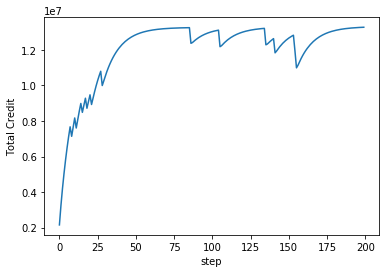

In [46]:
plt.plot(tot_credit_lst)
plt.ylabel('Total Credit')
plt.xlabel('step')
plt.show()

In [47]:
funding_df = pd.DataFrame(best_field_funding, columns = ["Field Funding"], index = all_cat)
funding_df.sort_values(by="Field Funding", ascending = False)

,Field Funding
physics:astro-ph,0.512784
physics:hep-lat,0.117735
physics:cond-mat,0.110927
math,0.091194
cs,0.054240
physics:hep-th,0.022065
physics:hep-ph,0.021432
physics:gr-qc,0.018832
physics:physics,0.018390
physics:quant-ph,0.011525
